In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(42)

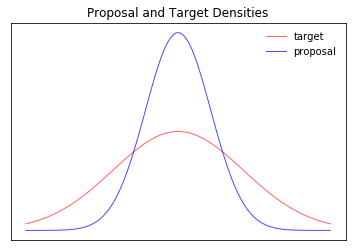

In [60]:
gauss1 = norm(loc=0.0, scale=1.0)
gauss2 = norm(loc=0.0, scale=0.5)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
fig, ax = plt.subplots(1,1)
ax.set_title("Proposal and Target Densities")
ax.plot(x, gauss1.pdf(x),'r-', lw=1, alpha=0.6, label='target')
ax.plot(x, gauss2.pdf(x), 'b-', lw=1, alpha=0.7, label='proposal')
ax.set_xticks([])
ax.set_yticks([])
ax.legend(loc='best', frameon=False)
plt.savefig("assets/importancesampling1.png")
plt.show()

In [85]:
sigmas = np.linspace(0.1, 1, 100)
mean_estimates = []
std_estimates = []
true = norm(loc=0.0, scale=1.0)

for sigma in sigmas:
    np.random.seed(42)
    prop = norm(loc=0.0, scale=sigma)
    samps = prop.rvs(size=1000)
    mean_estimates.append(np.mean(true.pdf(samps)/prop.pdf(samps)))
    std_estimates.append(np.std(true.pdf(samps)/prop.pdf(samps)))
    


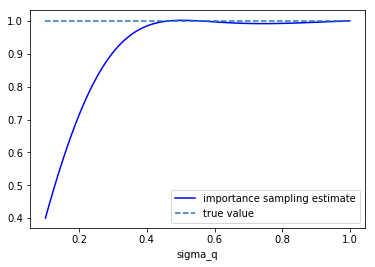

In [92]:
fig, ax = plt.subplots(1,1)
ax.plot(sigmas, mean_estimates, 'b', label="importance sampling estimate")
ax.plot(sigmas, np.ones(len(sigmas)), '--', label='true value')
ax.set_xlabel("sigma_q")
ax.legend()
plt.savefig("assets/mean_estimate.png")
plt.show()

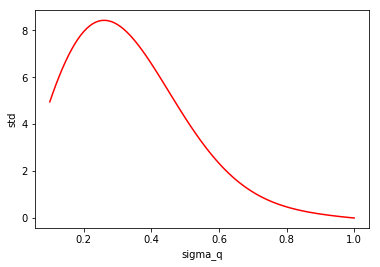

In [93]:
fig, ax = plt.subplots(1,1)
ax.plot(sigmas, std_estimates, 'r')
ax.set_xlabel("sigma_q")
ax.set_ylabel("std")
plt.savefig("assets/std_estimate.png")
plt.show()